In [22]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
!pip install keras

In [2]:
#We are going to use the handwritten digits dataset 
#It will load the train and test digits from the dataset 
#This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 
(X_train, y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()
#The X_train and y_train arrays are the training sets - the data the model uses to learn
#The model is tested against the test set , X_test and y_test arrays

<h3>Explore The Data</h3>

In [3]:
print("Shape Of X_train" , X_train.shape) #6000 images
print("Shape of y_train" , y_train.shape)
print("Shape of X_test" , X_test.shape) # 10000 images
print("Shape of y_test"  , y_test.shape)

Shape Of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of X_test (10000, 28, 28)
Shape of y_test (10000,)


In [4]:
X_train[0]
#each image is represented as 28 x 28 pixels:

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train[0].shape #28 by 28 pixels

(28, 28)

<h3>Preprocess The Data</h3>

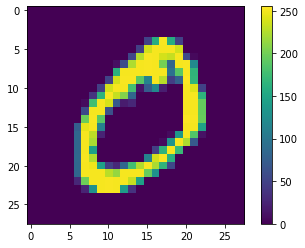

In [6]:
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
#The data must be preprocessed before training the network. 
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [7]:
y_train[1] # Our Output labels

0

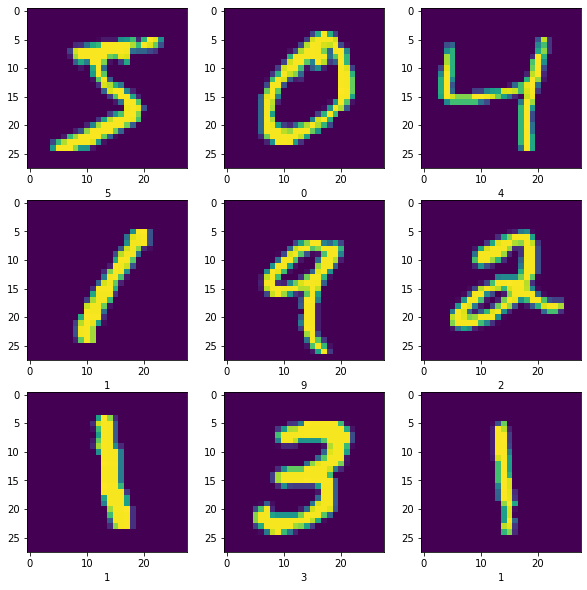

In [8]:
plt.figure(figsize = (10 , 10))
for i in range(9):
    plt.subplot(3 , 3 , i+1)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])

In [29]:
#Flatten the X test and X_train data
#Think of this layer as unstacking rows of pixels in the image and lining them up. 
#This layer has no parameters to learn; it only reformats the data.
X_Train_flat = X_train.reshape(len(X_train) , 28*28)
X_test_flat = X_test.reshape(len(X_test) , 28*28)
X_Train_flat = X_Train_flat /255
X_test_flat = X_test_flat/255

In [30]:
#The easiest way to build a neural network is to use the Sequential model Api. 
#It’s called the sequential model API because you first create an empty model object,
#and then you add layers to it one after another in sequence.
model = Sequential([
    Dense(10 , input_shape =(784 , ),activation ='sigmoid')
])

#The final step of defining a model is to compile it. 
#That’s when Keras actually builds a tensor flow model for us behind the scenes.


model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_Train_flat , y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4731 - accuracy: 0.8764
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9256


In [31]:
model.evaluate(X_test_flat , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.9253


[0.26675945520401, 0.9253000020980835]

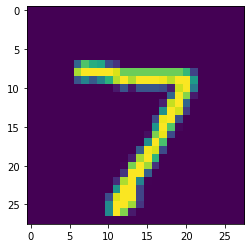

In [33]:
plt.imshow(X_test[0])

In [40]:
y_predict = model.predict(X_test_flat)
y_predict[0]

array([1.85421109e-02, 2.90660694e-07, 9.69457328e-02, 9.72732306e-01,
       3.67161632e-03, 1.23991996e-01, 1.46229854e-06, 9.99794006e-01,
       1.01375341e-01, 6.49538100e-01], dtype=float32)

In [43]:
np.argmax(y_predict[0])

7